In [140]:
import pandas as pd
import csv
from datetime import datetime
from matplotlib import pyplot
from pandas import datetime
import numpy as np
from matplotlib.pyplot import *
from statsmodels.graphics import tsaplots
import warnings
warnings.filterwarnings("ignore")

In [141]:
df=pd.read_csv('/Users/ananya/Cases_India.csv')

In [142]:
df

,DATE,variable,Confirmed,Deceased,Recovered
0,01-Apr-20,AN,0.0,0,0
1,01-Apr-20,AP,67.0,0,1
2,01-Apr-20,AR,0.0,0,0
3,01-Apr-20,AS,15.0,0,0
4,01-Apr-20,BR,3.0,0,0
...,...,...,...,...,...
1363,31-Mar-20,TR,0.0,0,0
1364,31-Mar-20,TT,309.0,6,15
1365,31-Mar-20,UP,8.0,0,0
1366,31-Mar-20,UT,0.0,0,0


In [143]:
df1=df.drop("variable",axis=1)

In [144]:
df2=df1.drop("Deceased",axis=1)

In [145]:
df30=df2.drop("Recovered",axis=1)

In [146]:
datafinal=df30.groupby('DATE').agg({'Confirmed': 'sum'}).reset_index()

In [147]:
datafinal["DATE"]= pd.to_datetime(datafinal["DATE"],errors="coerce")
datafinal

,DATE,Confirmed
0,2020-04-01,848.0
1,2020-04-02,972.0
2,2020-04-03,1120.0
3,2020-04-04,1158.0
4,2020-04-05,1218.0
5,2020-04-06,968.0
6,2020-04-07,1144.0
7,2020-04-08,1130.0
8,2020-04-09,1626.0
9,2020-04-10,1742.0


In [148]:
datafinal[['DATE','Confirmed']].plot('DATE','Confirmed', figsize=(14,8))

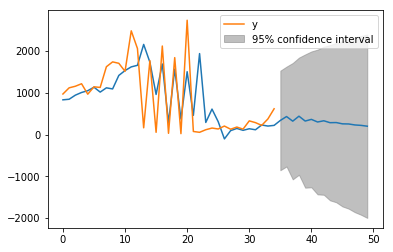

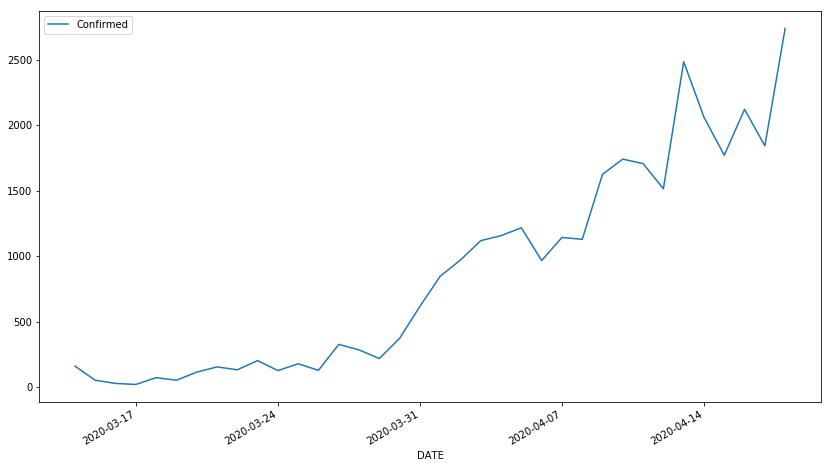

In [149]:
pyplot.show()

In [150]:
dataf=datafinal["Confirmed"]

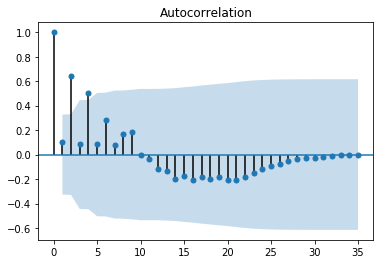

In [151]:
tsaplots.plot_acf(dataf)
#pyplot.show()

In [152]:
plot(dataf.diff())

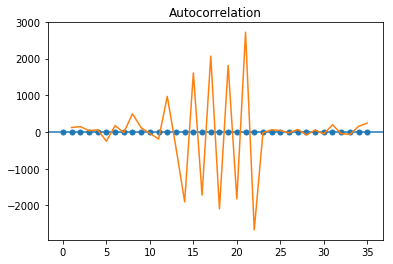

In [153]:
plt.show()

In [154]:
#d=1,p=2,q=2
from statsmodels.tsa.arima_model import ARIMA

# ARIMA Model
model=ARIMA(datafinal['Confirmed'].values, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary()) 

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -274.672
Method:                       css-mle   S.D. of innovations            608.725
Date:                Sun, 19 Apr 2020   AIC                            563.345
Time:                        19:37:05   BIC                            574.232
Sample:                             1   HQIC                           567.103
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.5183     42.691     -0.364      0.719     -99.191      68.154
ar.L1.D.y     -0.9208      0.168     -5.483      0.000      -1.250      -0.592
ar.L2.D.y     -0.3270      0.232     -1.407      0.1

In [155]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")

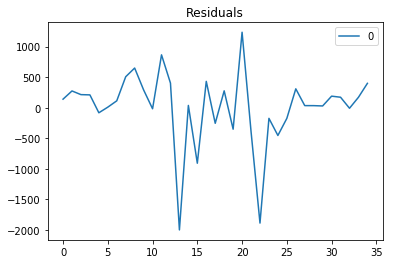

In [156]:
plt.show()

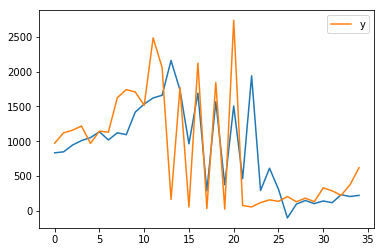

In [157]:
model_fit.plot_predict(dynamic=False)

predicted=338.199324, expected=74.000000
predicted=338.199324, expected=54.000000
predicted=338.199324, expected=116.000000
predicted=338.199324, expected=156.000000
predicted=338.199324, expected=134.000000
predicted=338.199324, expected=204.000000
predicted=338.199324, expected=128.000000
predicted=338.199324, expected=180.000000
predicted=338.199324, expected=130.000000
predicted=338.199324, expected=328.000000
predicted=338.199324, expected=286.000000
predicted=338.199324, expected=220.000000
predicted=338.199324, expected=374.000000
predicted=338.199324, expected=618.000000


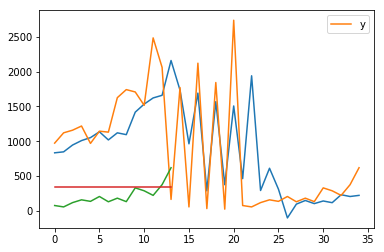

In [158]:
X=dataf.values
size=int(len(X)*0.6)
train=X[0:size]
test=X[size+1:len(X)]
history=[x for x in train]
prediction=[]
for fit in range(len(test)):
    model1=ARIMA(datafinal['Confirmed'].values, order=(5,1,0))
    model1_fit=model1.fit(disp=0)
    output = model1_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    obs = test[fit]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, prediction)
error
# plot
pyplot.plot(test)
pyplot.plot(prediction)
pyplot.show()


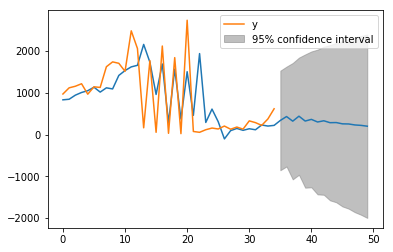

In [159]:
model1_fit.plot_predict(1,50)